In [50]:
%matplotlib inline
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress
# Import the requests library
import requests
# Import the API key
from config import weather_api_key
# Import datetime module from datetime library
from datetime import datetime

In [2]:
# Create a set of random latitudes and longtitudes combinations
lats=np.random.uniform(-90, 90, size=1500)
lngs= np.random.uniform(-180, 180, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add city to the cities list
    if city not in cities:
        cities.append(city)
    
# Print city count
len(cities) 

629

In [4]:
# Starting the URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da47acd65d1fcf05dbeb697bf2210c1


In [5]:
# Create an empty list to hold the weather data
city_data=[]

# Print thr beginning of the loggong
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count=1
set_count=1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i >= 50):
        set_count +=1
        record_count =1
        
    # Create endpoint URL with each city
    city_url = url+'&q='+ city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count+=1
    
    # Run API request for each city 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping '+ city)
        pass
# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping belushya guba
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | almaznyy
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping mys shmidta
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | tyret pervaya
Processing Record 15 of Set 1 | turukhansk
Processing Record 16 of Set 1 | darhan
Processing Record 17 of Set 1 | gummidipundi
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | buraydah
Processing Record 20 of Set 1 | santo domingo
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | dukat
Processing Recor

Processing Record 32 of Set 4 | bethanien
Processing Record 33 of Set 4 | tchollire
Processing Record 34 of Set 4 | jiexiu
Processing Record 35 of Set 4 | mar del plata
Processing Record 36 of Set 4 | dingle
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | tsabong
Processing Record 40 of Set 4 | elko
Processing Record 41 of Set 4 | bom jesus
Processing Record 42 of Set 4 | gornopravdinsk
Processing Record 43 of Set 4 | nieves
Processing Record 44 of Set 4 | olga
Processing Record 45 of Set 4 | lavrentiya
Processing Record 46 of Set 4 | goderich
Processing Record 47 of Set 4 | melhus
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | anadyr
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | burica
City not found. Skipping burica
Processing Record 2 of Set 5 | gimry
Processing Record 3 of Set 5 | dawlatabad
Processing Record 4 of Set 5 | dano
Processing Record 5 of Set 5 | high leve

Processing Record 17 of Set 8 | oksfjord
Processing Record 18 of Set 8 | male
Processing Record 19 of Set 8 | guozhen
Processing Record 20 of Set 8 | touros
Processing Record 21 of Set 8 | zhigansk
Processing Record 22 of Set 8 | puerto madryn
Processing Record 23 of Set 8 | hohhot
Processing Record 24 of Set 8 | husavik
Processing Record 25 of Set 8 | ancud
Processing Record 26 of Set 8 | hualmay
Processing Record 27 of Set 8 | montepuez
Processing Record 28 of Set 8 | usinsk
Processing Record 29 of Set 8 | silver city
Processing Record 30 of Set 8 | winston-salem
Processing Record 31 of Set 8 | aki
Processing Record 32 of Set 8 | rodrigues alves
Processing Record 33 of Set 8 | dossor
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | pirovskoye
Processing Record 36 of Set 8 | hanzhong
Processing Record 37 of Set 8 | bonthe
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | maple creek
Processing Record 40 of Set 8 | malwan
City not found. Skippi

Processing Record 2 of Set 12 | voh
Processing Record 3 of Set 12 | savannakhet
Processing Record 4 of Set 12 | sandwick
Processing Record 5 of Set 12 | tahta
City not found. Skipping tahta
Processing Record 6 of Set 12 | tlamacazapa
Processing Record 7 of Set 12 | belyy yar
Processing Record 8 of Set 12 | japura
Processing Record 9 of Set 12 | constitucion
Processing Record 10 of Set 12 | tete
Processing Record 11 of Set 12 | biharamulo
Processing Record 12 of Set 12 | claremore
Processing Record 13 of Set 12 | umba
Processing Record 14 of Set 12 | ye
City not found. Skipping ye
Processing Record 15 of Set 12 | general teran
Processing Record 16 of Set 12 | vila franca do campo
Processing Record 17 of Set 12 | arawa
Processing Record 18 of Set 12 | nizhneangarsk
Processing Record 19 of Set 12 | santa cruz de la palma
Processing Record 20 of Set 12 | saint-pierre
Processing Record 21 of Set 12 | alta floresta
Processing Record 22 of Set 12 | yuli
Processing Record 23 of Set 12 | zhovti

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,62.01,31,40,14.99,AU,2019-11-06 00:15:02
1,Thompson,55.74,-97.86,5.00,77,40,3.36,CA,2019-11-06 00:17:34
2,Busselton,-33.64,115.35,63.00,52,45,5.14,AU,2019-11-06 00:16:47
3,Butaritari,3.07,172.79,84.04,76,1,11.74,KI,2019-11-06 00:17:11
4,Almaznyy,48.03,40.04,50.00,76,75,6.71,RU,2019-11-06 00:25:29


In [8]:
# Reorder the columns
new_col_order= ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_date_df= city_data_df[new_col_order]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,62.01,31,40,14.99,AU,2019-11-06 00:15:02
1,Thompson,55.74,-97.86,5.00,77,40,3.36,CA,2019-11-06 00:17:34
2,Busselton,-33.64,115.35,63.00,52,45,5.14,AU,2019-11-06 00:16:47
3,Butaritari,3.07,172.79,84.04,76,1,11.74,KI,2019-11-06 00:17:11
4,Almaznyy,48.03,40.04,50.00,76,75,6.71,RU,2019-11-06 00:25:29


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Scatter plot for different lat different temp

In [11]:
# Extract relevant fieldd from the DataFrame
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [24]:
# Import the time module
import time
# get today's date in seconds
today = time.strftime('%x')
today

'11/05/19'

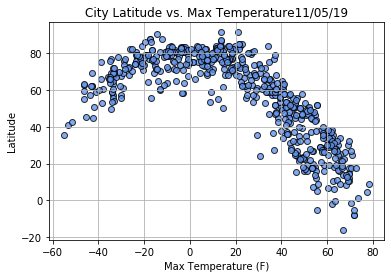

In [45]:
# Build the scatter plot for latitude vs. max temperaturr
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o", color='cornflowerblue',
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature'+ time.strftime('%x'))
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data\Fig1.png')

plt.show()

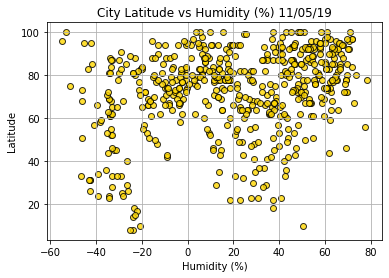

In [41]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, marker='o', color='gold', edgecolor='black', linewidths=1, alpha=.8, label='Cities')
# Incorporate other graph properties
plt.title(f'City Latitude vs Humidity (%) ' +time.strftime('%x'))
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data\Fig2.png')
plt.show()

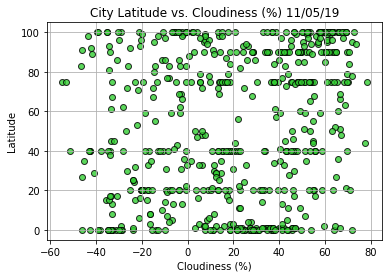

In [43]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter( lats, cloudiness, marker='o', color='limegreen', edgecolor='black', linewidths=1, alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')
plt.show()

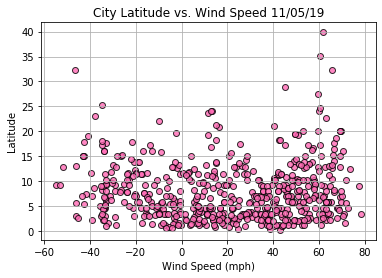

In [48]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter( lats, wind_speed, marker='o', color='hotpink', edgecolor='black', linewidths=1, alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')
plt.show()

In [72]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
index13 = city_data_df.loc[13]
index13

City                       Darhan
Lat                         49.49
Lng                        105.92
Max Temp                    23.63
Humidity                       70
Cloudiness                      0
Wind Speed                   2.01
Country                        MN
Date          2019-11-06 00:25:31
Name: 13, dtype: object

In [74]:
# Create Northern and Southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

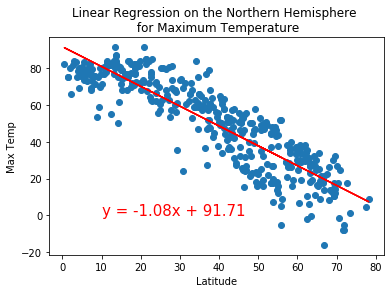

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

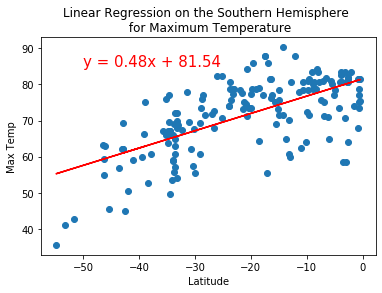

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

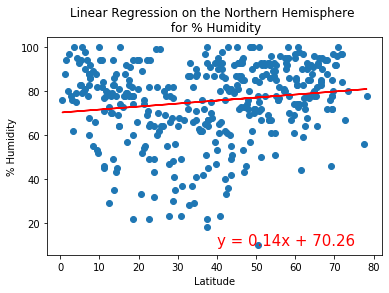

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

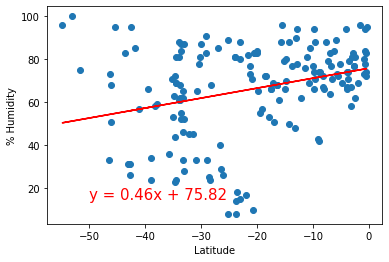

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

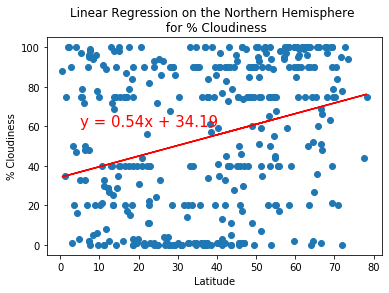

In [81]:
# Linear regression on the NOrthern Hemisphere cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (5,60))

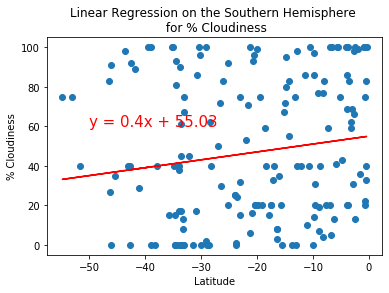

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

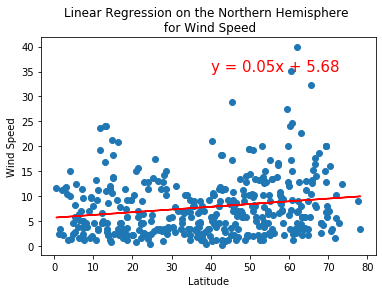

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

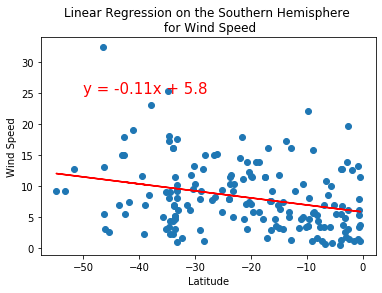

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))